## 1. 선형적으로 분리되는 데이터셋에 여러 선형 분류기 적용하기
선형적으로 분리 가능한 데이터셋을 직접 생성하고, 세 가지 다른 선형 분류기(LinearSVC, SVC with linear kernel, SGDClassifier)를 훈련시켜 결과를 비교해 봅시다!☺️

In [25]:
!pip install -q matplotlib
!pip install -q --upgrade matplotlib
!pip install -q koreanize-matplotlib

import koreanize_matplotlib

In [26]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

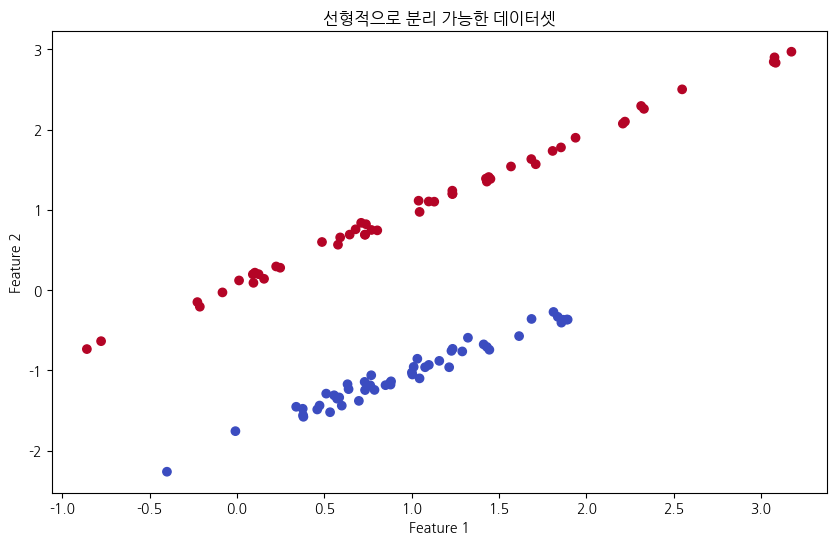

In [27]:
# 선형적으로 분리 가능한 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42, n_clusters_per_class=1)

# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap=plt.cm.coolwarm)
plt.title('선형적으로 분리 가능한 데이터셋')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# 모델 생성
linear_svc = LinearSVC(random_state=42)
svc = SVC(kernel='linear', random_state=42)
sgd = SGDClassifier(loss='hinge', alpha=0.0001, random_state=42)

# 데이터 스케일링과 모델 훈련을 파이프라인으로 구성
models = {
    'LinearSVC': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', linear_svc)
    ]),
    'SVC with linear kernel': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', svc)
    ]),
    'SGDClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', sgd)
    ])
}

# 모델 훈련 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    results[name] = {
        'train_score': train_score,
        'test_score': test_score
    }
    print(f"{name} - 훈련 정확도: {train_score:.4f}, 테스트 정확도: {test_score:.4f}")

LinearSVC - 훈련 정확도: 1.0000, 테스트 정확도: 1.0000
SVC with linear kernel - 훈련 정확도: 1.0000, 테스트 정확도: 1.0000
SGDClassifier - 훈련 정확도: 1.0000, 테스트 정확도: 1.0000


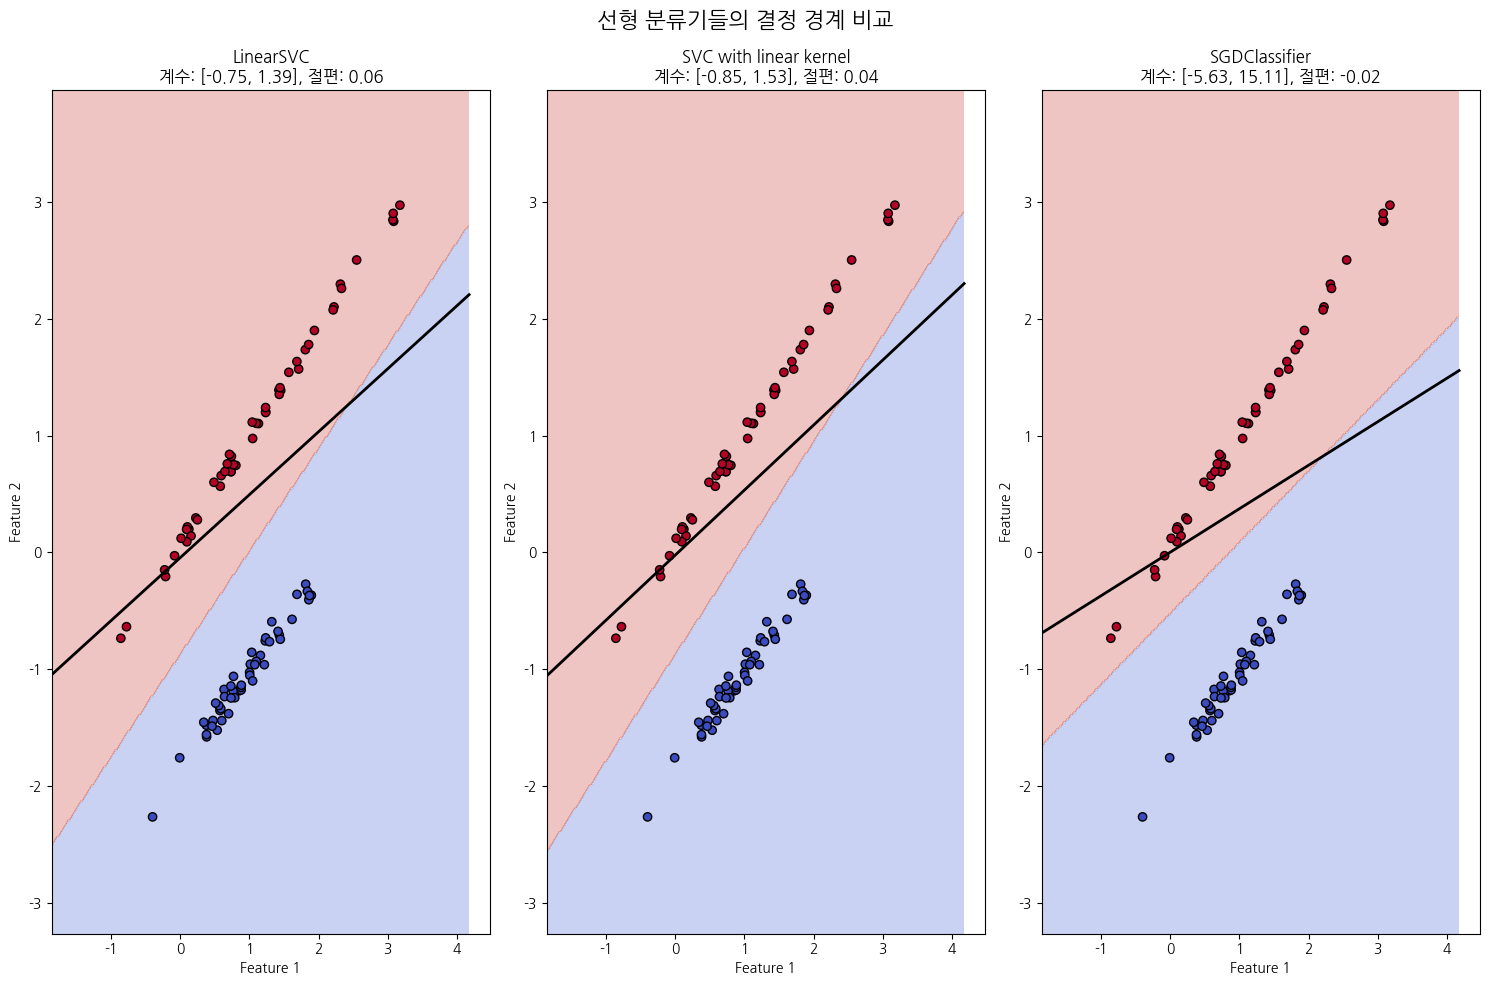

In [29]:
# 결정 경계 시각화 함수
def plot_decision_boundaries(X, y, models, title):
    h = 0.02  # 격자 간격
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.figure(figsize=(15, 10))

    for i, (name, model) in enumerate(models.items()):
        plt.subplot(1, 3, i+1)

        # 결정 경계 예측
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # 결정 경계 시각화
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

        # 데이터 포인트 시각화
        plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap=plt.cm.coolwarm, edgecolors='k')

        # 모델 계수 추출 및 표시
        if name == 'LinearSVC':
            coef = model.named_steps['classifier'].coef_[0]
            intercept = model.named_steps['classifier'].intercept_[0]
        elif name == 'SVC with linear kernel':
            coef = model.named_steps['classifier'].coef_[0]
            intercept = model.named_steps['classifier'].intercept_[0]
        else:  # SGDClassifier
            coef = model.named_steps['classifier'].coef_[0]
            intercept = model.named_steps['classifier'].intercept_[0]

        # 결정 경계 직선 시각화
        slope = -coef[0] / coef[1]
        xx_line = np.linspace(x_min, x_max)
        yy_line = slope * xx_line - (intercept / coef[1])
        plt.plot(xx_line, yy_line, 'k-', linewidth=2)

        plt.title(f"{name}\n계수: [{coef[0]:.2f}, {coef[1]:.2f}], 절편: {intercept:.2f}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

# 결정 경계 시각화
plot_decision_boundaries(X, y, models, "선형 분류기들의 결정 경계 비교")

In [30]:
# 각 모델의 계수 및 절편 추출
coefficients = {}
for name, model in models.items():
    if name == 'LinearSVC':
        coef = model.named_steps['classifier'].coef_[0]
        intercept = model.named_steps['classifier'].intercept_[0]
    elif name == 'SVC with linear kernel':
        coef = model.named_steps['classifier'].coef_[0]
        intercept = model.named_steps['classifier'].intercept_[0]
    else:  # SGDClassifier
        coef = model.named_steps['classifier'].coef_[0]
        intercept = model.named_steps['classifier'].intercept_[0]

    # 계수 정규화 (방향만 비교하기 위해)
    coef_norm = coef / np.linalg.norm(coef)

    coefficients[name] = {
        'coef': coef,
        'coef_normalized': coef_norm,
        'intercept': intercept
    }

# 정규화된 계수 비교
print("정규화된 계수 비교:")
for name, values in coefficients.items():
    print(f"{name}: {values['coef_normalized']}")

정규화된 계수 비교:
LinearSVC: [-0.4745515   0.88022774]
SVC with linear kernel: [-0.48630785  0.87378754]
SGDClassifier: [-0.34900471  0.93712097]


- 정확도 비교: 세 모델 모두 훈련 및 테스트 세트에서 높은 정확도를 보임. 이는 데이터가 선형적으로 분리 가능하기 때문에 예상할 수 있는 결과

- 결정 경계 비교: 세 모델이 매우 유사한 결정 경계를 찾아냄. (모두 선형 모델이므로)

- 계수 비교: 계수의 절대값은 다를 수 있지만, 정규화된 계수(방향)는 매우 유사함. 이는 세 모델이 본질적으로 같은 결정 경계를 찾았음을 의미

### 모델 간의 차이점
- LinearSVC: L2 정규화를 사용하는 선형 SVM 구현체로, 대량의 데이터셋에 효율적입니다.
- SVC with linear kernel: 더 일반적인 SVM 구현체로, 다양한 커널을 지원하지만 여기서는 선형 커널을 사용했습니다.
- SGDClassifier with hinge loss: 확률적 경사 하강법을 사용하여 선형 SVM을 근사화합니다. 대규모 데이터셋에 유용합니다.

## 2. 선형적으로 분리되는 데이터셋에 여러 선형 분류기 적용하기
와인 데이터셋에서 SVM 분류기를 훈련하세요. 이 데이터셋에는 세 명의 재배자가 생성한 와인 샘플 178개의 화학 성분이 포함되어 있습니다. 목표는 와인의 화학 성분을 기반으로 재배자를 예측할 수 있는 분류 모델을 훈련하는 것 입니다.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns

# 와인 데이터셋 로드
wine = load_wine()
X = wine.data
y = wine.target

# 데이터셋 기본 정보 확인
print(f"데이터셋 크기: {X.shape}")
print(f"클래스 분포: {np.bincount(y)}")
print(f"특성 이름: {wine.feature_names}")
print(f"클래스 이름: {wine.target_names}")

데이터셋 크기: (178, 13)
클래스 분포: [59 71 48]
특성 이름: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
클래스 이름: ['class_0' 'class_1' 'class_2']


In [32]:
# 데이터 전처리: 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# SVM 모델 정의 및 훈련
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# 모델 성능 평가
y_pred = svm.predict(X_test)
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

print(f"훈련 정확도: {train_accuracy:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")
print("\n분류 보고서:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

훈련 정확도: 1.0000
테스트 정확도: 0.9815

분류 보고서:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



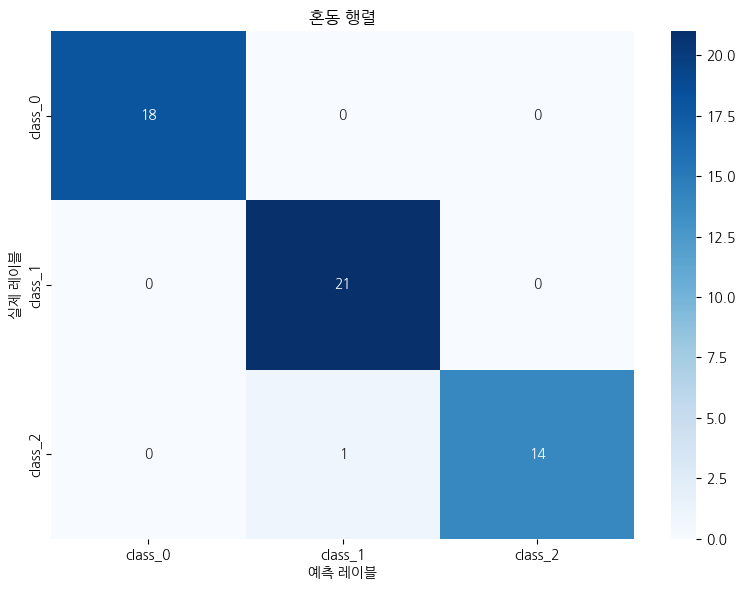

In [33]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.xlabel('예측 레이블')
plt.ylabel('실제 레이블')
plt.title('혼동 행렬')
plt.tight_layout()
plt.show()

In [34]:
# 교차 검증으로 모델 평가
cv_scores = cross_val_score(svm, X_scaled, y, cv=5)
print(f"5-겹 교차 검증 정확도: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 하이퍼파라미터 최적화
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_scaled, y)

print(f"최적 파라미터: {grid_search.best_params_}")
print(f"최고 교차 검증 정확도: {grid_search.best_score_:.4f}")

5-겹 교차 검증 정확도: [1.         0.97222222 0.94444444 1.         1.        ]
평균 교차 검증 정확도: 0.9833 ± 0.0222
Fitting 5 folds for each of 60 candidates, totalling 300 fits
최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 정확도: 0.9889


In [35]:
# 최적 모델로 최종 평가
best_svm = grid_search.best_estimator_
best_train_accuracy = best_svm.score(X_train, y_train)
best_test_accuracy = best_svm.score(X_test, y_test)

print(f"최적 모델 훈련 정확도: {best_train_accuracy:.4f}")
print(f"최적 모델 테스트 정확도: {best_test_accuracy:.4f}")

최적 모델 훈련 정확도: 1.0000
최적 모델 테스트 정확도: 1.0000


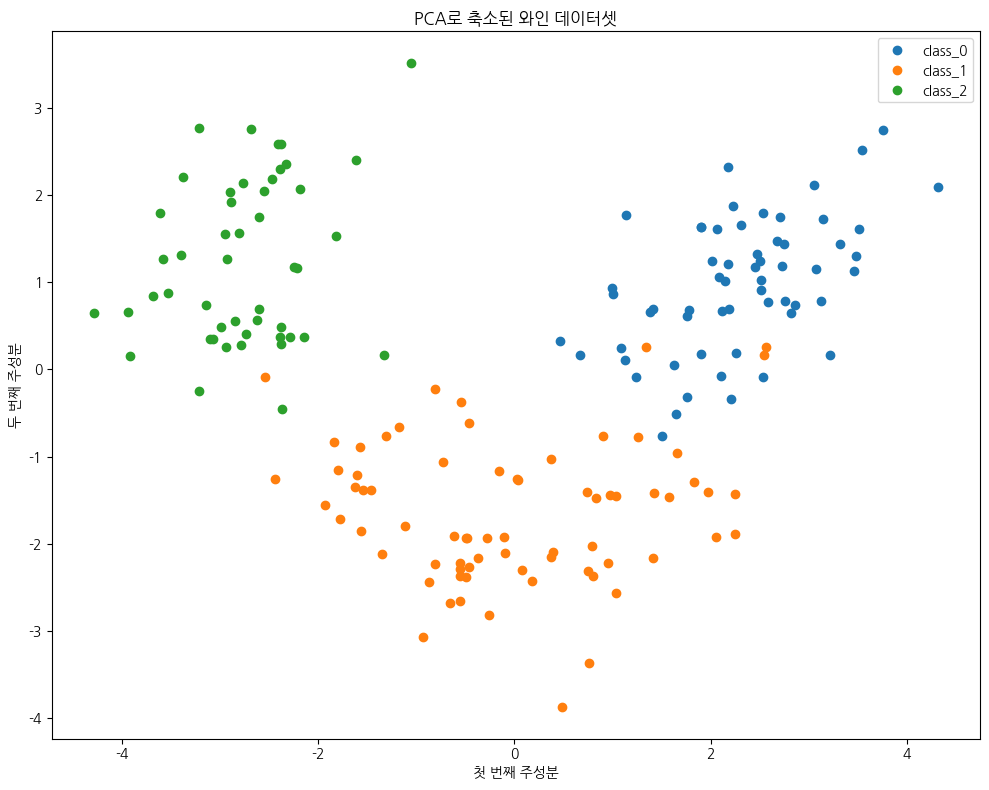

In [36]:
# 데이터 시각화 (차원 축소 후)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
for i, target_name in enumerate(wine.target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        label=target_name
    )
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.title('PCA로 축소된 와인 데이터셋')
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# 결정 경계 시각화 (PCA로 축소된 공간에서)
def plot_decision_boundaries(X, y, model, title):
    h = 0.02  # 격자 간격
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 결정 경계 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    # 데이터 포인트 시각화
    for i, target_name in enumerate(wine.target_names):
        plt.scatter(
            X[y == i, 0], X[y == i, 1],
            label=target_name
        )

    plt.xlabel('첫 번째 주성분')
    plt.ylabel('두 번째 주성분')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

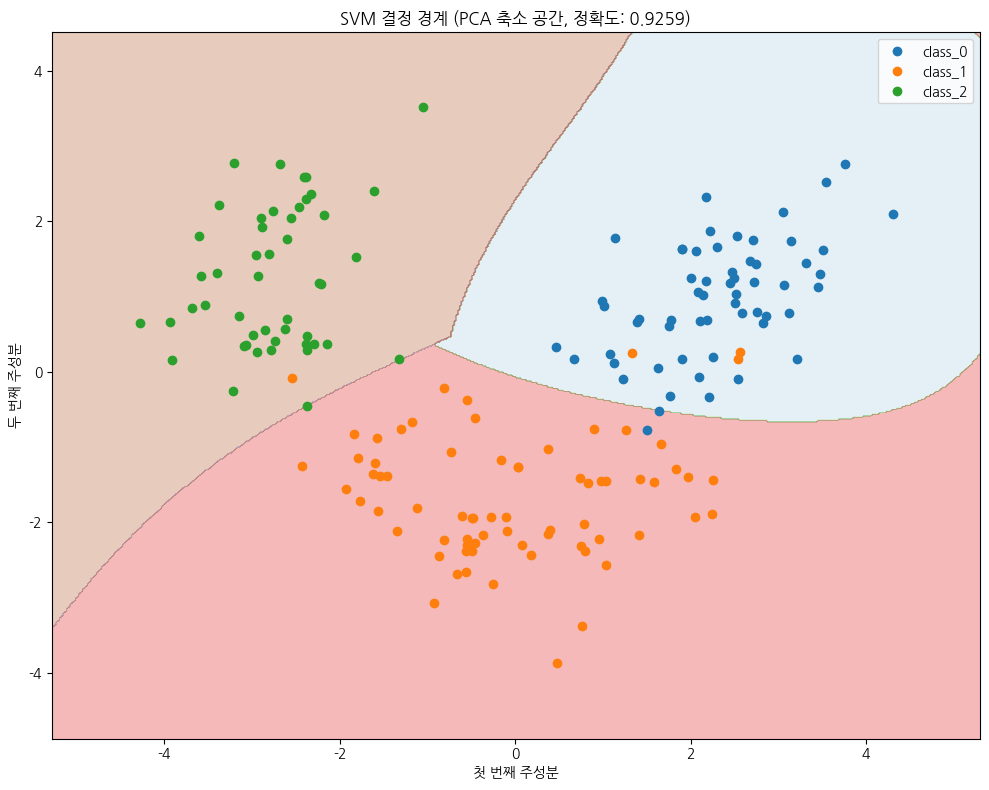

In [24]:
# PCA 차원 축소 후 결정 경계 시각화
X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

pca_svm = SVC(**grid_search.best_params_, random_state=42)
pca_svm.fit(X_pca_train, y_train_pca)

plot_decision_boundaries(
    X_pca, y, pca_svm,
    f"SVM 결정 경계 (PCA 축소 공간, 정확도: {pca_svm.score(X_pca_test, y_test_pca):.4f})"
)